In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold
from scipy.spatial import distance
from rdkit.Chem import AllChem as Chem
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
from rdkit.Chem import Draw
from rdkit.Chem.SaltRemover import SaltRemover

## Load drugbank and calculate fingerprints

In [15]:
supp = Chem.SDMolSupplier("../data/drugbank.sdf")
drugbank = [m for m in supp if m]
fps = [Chem.GetMorganFingerprintAsBitVect(m,2,nBits=1024) for m in drugbank]
drugbank[:3]

## Prepare full distance matrix

In [3]:
sparse_mat = distance.pdist(fps,metric="jaccard")
dist_mat = distance.squareform(sparse_mat)

## Calculate new 2D coordinates with MDS

In [6]:

#----------------------------------------------------------------------
# MDS  embedding of the digits dataset
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100, dissimilarity="precomputed")
X_mds = clf.fit_transform(dist_mat)

## Function visualizing 2D points

In [7]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None, highlights=[]):
    fig = plt.figure()
    # ax = plt.subplot(111)
    for i, point in enumerate(X):
        x,y = point
        if i in highlights:
            plt.plot([x],[y],"r.", markersize=4)
        else:
            plt.plot([x],[y],"k.", markersize=1)
    # plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    return fig

## Show drugbank in 2D space

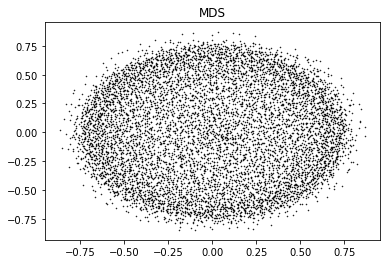

In [8]:
plot_embedding(X_mds,"MDS")

## Too much inorganic will kill you

In [9]:
hasCarbonPatt = Chem.MolFromSmarts("[#6]")
hasCarbons = [(i, m.HasSubstructMatch(hasCarbonPatt)) for i,m in enumerate(drugbank)]
hasCarbonIdxs = [i for i,has in hasCarbons if has]
hasNotCarbonIdxs = [i for i,has in hasCarbons if not has]
len(hasCarbonIdxs)

7031

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


## Remove inorganic structure

In [16]:
onlyOrganicPatt = Chem.MolFromSmarts("[!#6;!#7;!#8;!#16;!F;!Cl;!Br;!I]")
onlyOrganics = [(i, m.HasSubstructMatch(hasCarbonPatt) and not m.HasSubstructMatch(onlyOrganicPatt)) for i,m in enumerate(drugbank)]
onlyOrganicIdxs = [i for i,hasPatt in onlyOrganics if hasPatt]
notOnlyOrganicIdxs = [i for i,hasPatt in onlyOrganics if not hasPatt]

## Remove salts

In [18]:
remover = SaltRemover(defnData='[!C;!c;!#7;!#8;!#16;!Cl;!F;!Br;!I]')
remover2 = SaltRemover()

In [19]:
print([Chem.MolToSmarts(mol) for mol in remover.salts])
print([Chem.MolToSmarts(mol) for mol in remover2.salts])

['[!C&!c&!#7&!#8&!#16&!Cl&!F&!Br&!I]']
['[Cl,Br,I]', '[#3,#11,#19,#20,#12]', '[O,N]', 'N(=O)(-,:O)-,:O', 'P(=O)(-,:O)(-,:O)-,:O', 'P(-,:F)(-,:F)(-,:F)(-,:F)(-,:F)-,:F', 'S(=O)(=O)(-,:O)-,:O', '[C&H3]-,:S(=O)(=O)-,:O', 'c1:,-c:,-c(-,:[C&H3]):,-c:,-c:,-c:,-1-,:S(=O)(=O)-,:O', '[C&H3]-,:C(=O)-,:O', 'F-,:C(-,:F)(-,:F)-,:C(=O)-,:O', 'O-,:C(=O)-,:C=C-,:C(=O)-,:O', 'O-,:C(=O)-,:C(=O)-,:O', 'O-,:C(=O)-,:C(-,:O)-,:C(-,:O)-,:C(=O)-,:O', 'C1-,:C-,:C-,:C-,:C-,:C-,:1-,:[N&H1]-,:C1-,:C-,:C-,:C-,:C-,:C-,:1']


In [20]:
print(Chem.MolToSmiles(drugbank[notOnlyOrganicIdxs[13]]))
print(Chem.MolToSmiles(remover2(drugbank[notOnlyOrganicIdxs[13]])))

O=C([O-])C(O)C(O)C(O)C(O)C(O)CO.O=C([O-])C(O)C(O)C(O)C(O)C(O)CO.[Ca+2]
O=C([O-])C(O)C(O)C(O)C(O)C(O)CO.O=C([O-])C(O)C(O)C(O)C(O)C(O)CO


In [22]:
notOnlyOrganicIdxs

[7,
 8,
 23,
 36,
 49,
 62,
 79,
 91,
 148,
 172,
 176,
 190,
 215,
 216,
 253,
 258,
 287,
 322,
 351,
 379,
 400,
 401,
 411,
 414,
 416,
 419,
 423,
 454,
 482,
 515,
 538,
 552,
 562,
 594,
 602,
 604,
 627,
 645,
 656,
 672,
 698,
 711,
 766,
 837,
 849,
 873,
 933,
 953,
 1008,
 1018,
 1039,
 1044,
 1056,
 1150,
 1158,
 1159,
 1187,
 1197,
 1198,
 1199,
 1200,
 1201,
 1206,
 1212,
 1215,
 1362,
 1370,
 1377,
 1378,
 1415,
 1419,
 1422,
 1426,
 1432,
 1435,
 1437,
 1440,
 1442,
 1443,
 1445,
 1453,
 1455,
 1456,
 1459,
 1460,
 1462,
 1470,
 1474,
 1478,
 1481,
 1483,
 1485,
 1486,
 1489,
 1493,
 1502,
 1503,
 1506,
 1511,
 1513,
 1520,
 1528,
 1534,
 1542,
 1543,
 1546,
 1551,
 1555,
 1557,
 1559,
 1560,
 1563,
 1564,
 1569,
 1572,
 1575,
 1576,
 1582,
 1592,
 1593,
 1594,
 1595,
 1603,
 1605,
 1608,
 1610,
 1618,
 1620,
 1621,
 1622,
 1624,
 1625,
 1628,
 1649,
 1650,
 1651,
 1654,
 1657,
 1661,
 1668,
 1673,
 1676,
 1684,
 1691,
 1693,
 1705,
 1706,
 1707,
 1708,
 1710,
 1711,
 